In [8]:
import sys
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import cv2

from google.colab import files

In [2]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.0.1+cu118
Torchvision version: 0.15.2+cu118
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-mrm74w_n
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-mrm74w_n
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=c45ae07996cfa51a987b58df6adaf990fb6de136decb86f1f3ffd67f81b84657
  Stored in directory: /tmp/pip-ephem-wheel-cache-a8z_2izq/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2023-07-14 21:44:27--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.59, 13.227.219.10, 

In [3]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
url = 'https://drive.google.com/uc?id={}'.format('1utYjSyYF1D4F2DdYU9T6UkAfrI_CLgM5')
print(url)
image_cv2 = cv2.imread(url)

https://drive.google.com/uc?id=1utYjSyYF1D4F2DdYU9T6UkAfrI_CLgM5


In [19]:
uploaded = files.upload()
image_cv2 = cv2.imread('doubleplant.png')

KeyboardInterrupt: ignored

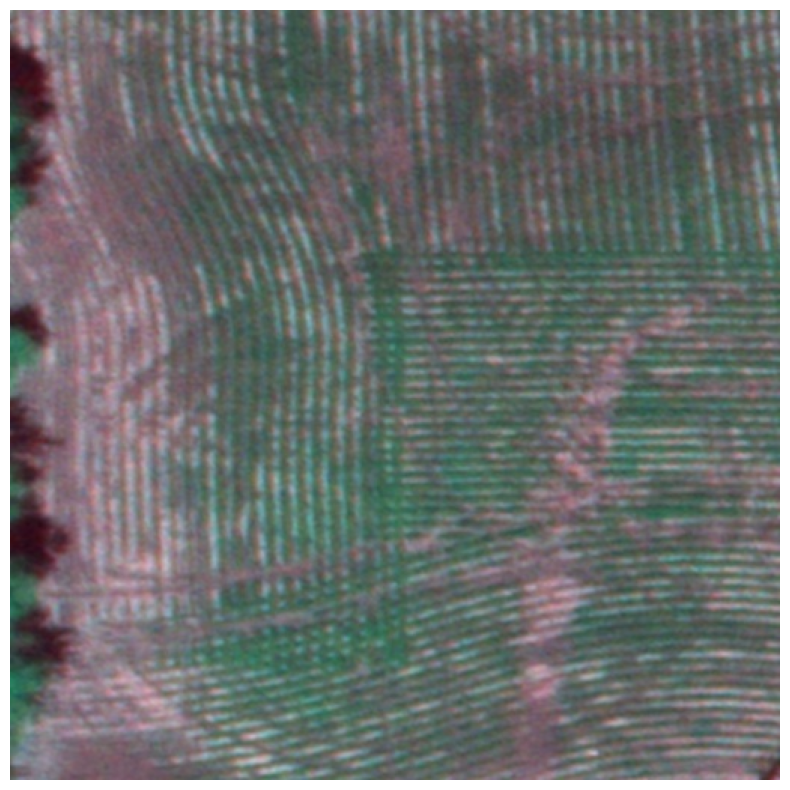

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(image_cv2)
plt.axis('off')
plt.show()

In [17]:
sys.path.append("..")

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

masks = mask_generator.generate(image_cv2)

print(len(masks))
print(masks[0].keys())

4
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


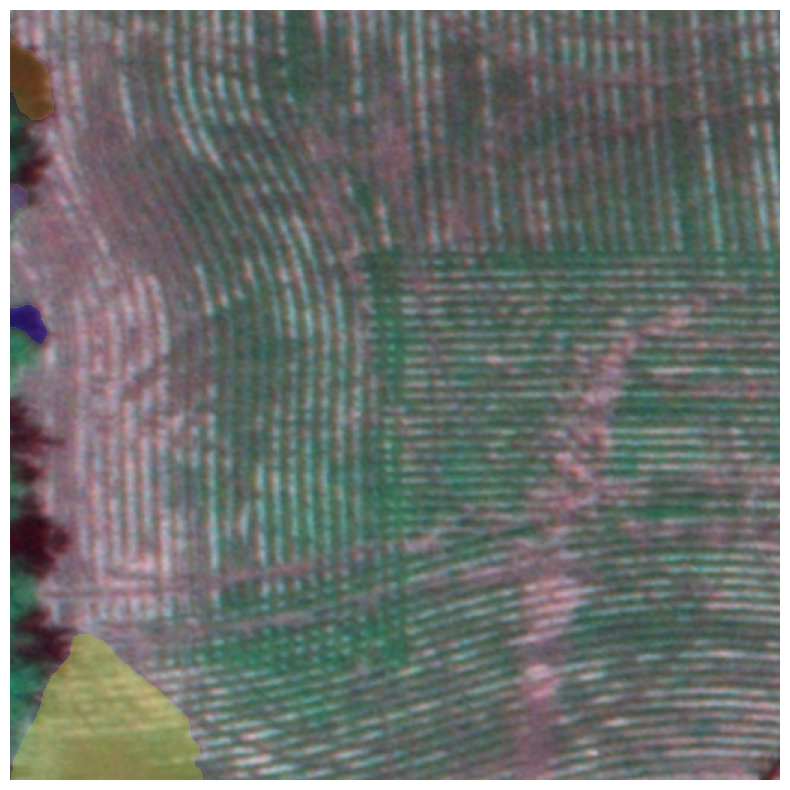

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(image_cv2)
show_anns(masks)
plt.axis('off')
plt.show()